# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Loading Dataset

In [2]:
df=pd.read_csv('Training.csv')

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df.shape

(4920, 133)

In [5]:
dis_list = []
for dis in df['prognosis']:
    dis_list.append(dis)

In [6]:
df[df['prognosis']=="Fungal infection"].iloc[:,0:-1].apply(np.sum,axis=1).max()

4

In [7]:
def apply_fun(Disease):
    return df[df['prognosis']==Disease].iloc[:,0:-1].apply(np.sum,axis=1).max()

In [8]:
apply_fun('Fungal infection')

4

In [9]:
value={}
for Disease in df['prognosis'].unique():
    value[Disease]=apply_fun(Disease)    

## This function maps diseases with number of symptoms each disease has. 

In [10]:
value

{'Fungal infection': 4,
 'Allergy': 4,
 'GERD': 6,
 'Chronic cholestasis': 7,
 'Drug Reaction': 5,
 'Peptic ulcer diseae': 6,
 'AIDS': 4,
 'Diabetes ': 10,
 'Gastroenteritis': 4,
 'Bronchial Asthma': 6,
 'Hypertension ': 5,
 'Migraine': 9,
 'Cervical spondylosis': 5,
 'Paralysis (brain hemorrhage)': 4,
 'Jaundice': 8,
 'Malaria': 8,
 'Chicken pox': 11,
 'Dengue': 14,
 'Typhoid': 11,
 'hepatitis A': 11,
 'Hepatitis B': 12,
 'Hepatitis C': 6,
 'Hepatitis D': 9,
 'Hepatitis E': 13,
 'Alcoholic hepatitis': 7,
 'Tuberculosis': 16,
 'Common Cold': 17,
 'Pneumonia': 11,
 'Dimorphic hemmorhoids(piles)': 5,
 'Heart attack': 4,
 'Varicose veins': 7,
 'Hypothyroidism': 13,
 'Hyperthyroidism': 11,
 'Hypoglycemia': 12,
 'Osteoarthristis': 6,
 'Arthritis': 5,
 '(vertigo) Paroymsal  Positional Vertigo': 6,
 'Acne': 4,
 'Urinary tract infection': 4,
 'Psoriasis': 6,
 'Impetigo': 5}

## Visual representation of the diseases mapped with their symptom count.

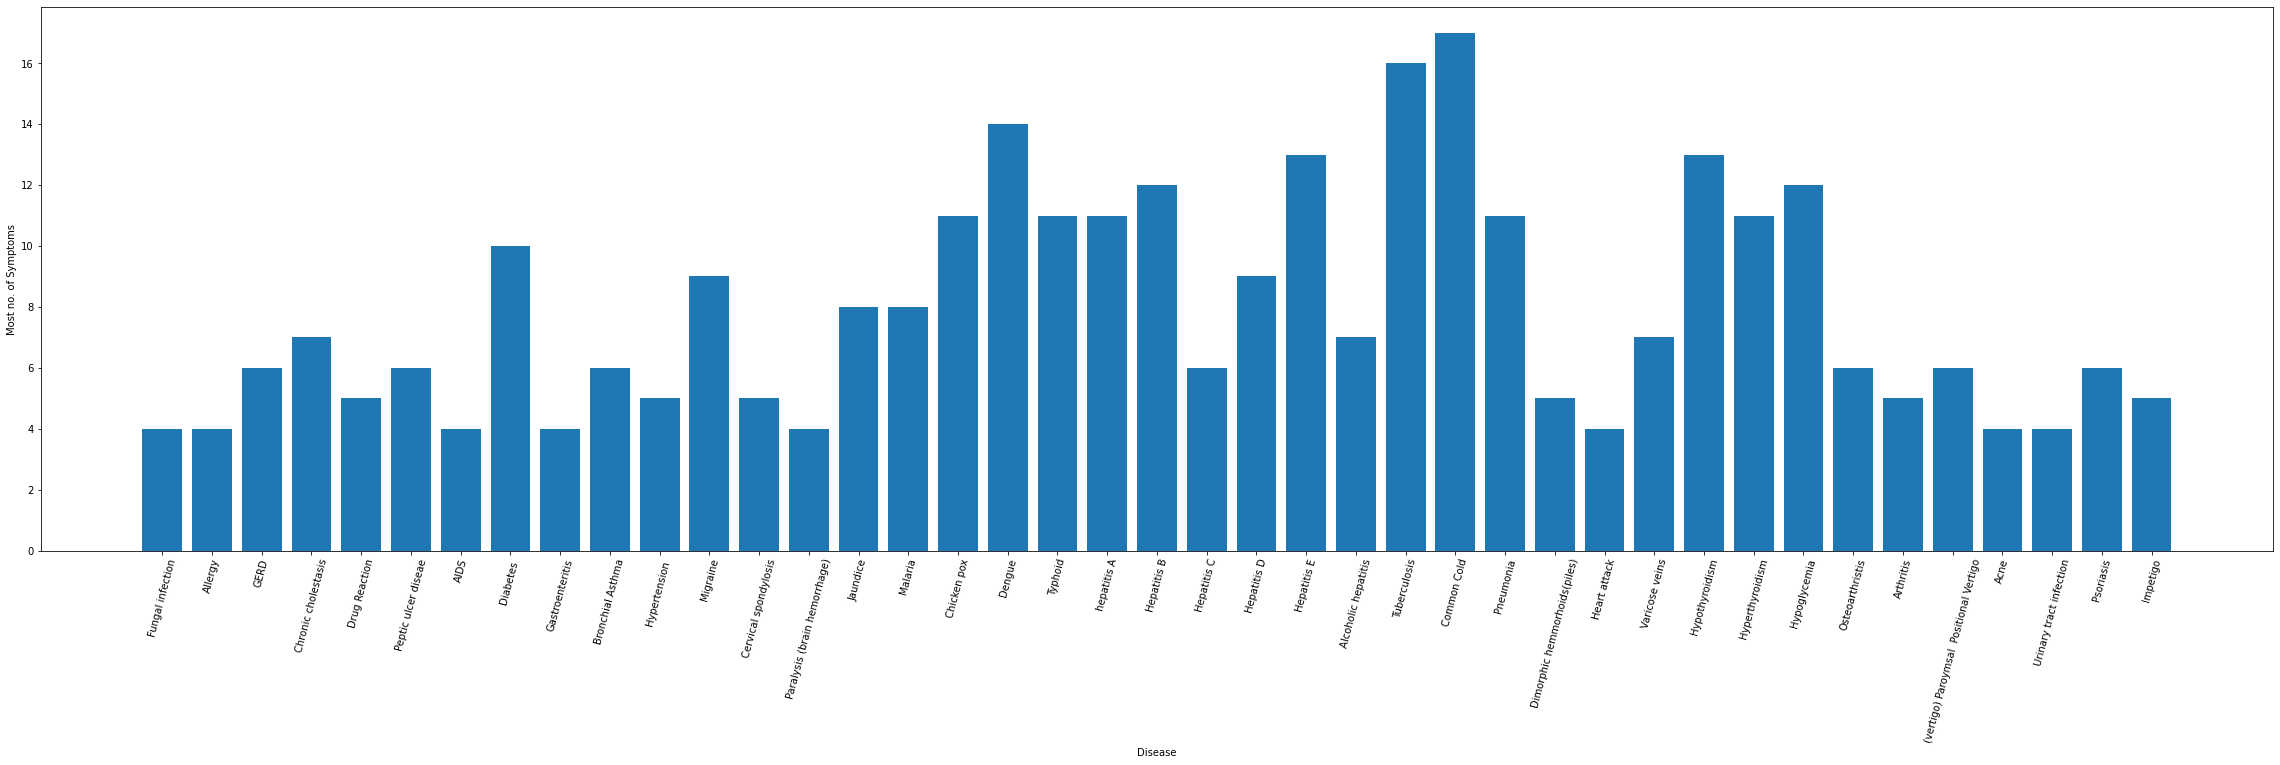

In [11]:
x = value.keys()
y=value.values()
fig, ax = plt.subplots(figsize=(40, 10))
plt.bar(x, y) 
plt.xticks(label=x ,rotation=75)
plt.xlabel('Disease')
plt.ylabel('Most no. of Symptoms')
plt.show()

## Wordcloud generation of diseases.

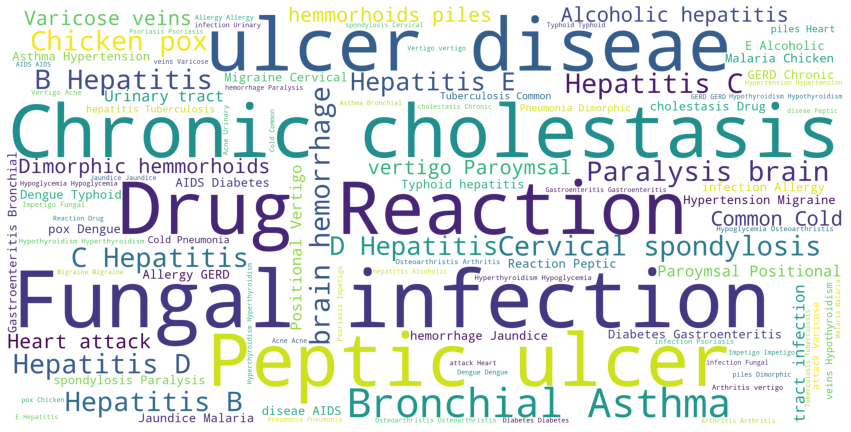

In [12]:
def generate_wordcloud(text):
    wordcloud = WordCloud(background_color = "white",width=3000,height = 1500).generate(text)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(" ".join(dis_list))

**This wordcloud is generated on the basis of the frequency of their occurence.**

In [13]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

# Creating Feature and Target variables

In [14]:
x=df.iloc[:,:-1]
y=df['prognosis']

# Splitting Train and Test data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

# Voting classifier model

![image_un](https://miro.medium.com/max/1280/1*yl94cZSxYP7mE6rllD_4og.jpeg)

**Image-Source :** https://miro.medium.com/max/1280/1*yl94cZSxYP7mE6rllD_4og.jpeg

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

#LinearSVC
#L_V = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

#SVC
S_V_C = OneVsRestClassifier(SVC(probability=True,random_state=0)).fit(X_train, y_train)

#LogisticRegression
L_R = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train)

#GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)

#RandomForestClassifer
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

A **voting ensemble** (or a **“majority voting ensemble“**) is an ensemble machine learning model that combines the predictions from multiple other models. It is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble.

In [17]:
classifiers=[('S_V_C',S_V_C),('L_R',L_R),('clf',clf),('rf',rf_clf)]

In [18]:
voted_classifier=VotingClassifier(estimators=classifiers,voting='soft')

![image_bi](https://pic4.zhimg.com/80/v2-79cebab4d083ec46c9dbe03fb718c237_1440w.jpg)

**Image-Source :** https://pic4.zhimg.com/80/v2-79cebab4d083ec46c9dbe03fb718c237_1440w.jpg

In [19]:
voted_classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('S_V_C',
                              OneVsRestClassifier(estimator=SVC(probability=True,
                                                                random_state=0))),
                             ('L_R',
                              OneVsRestClassifier(estimator=LogisticRegression(random_state=0))),
                             ('clf',
                              GradientBoostingClassifier(random_state=0)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [20]:
voted_classifier.predict(X_test)

array(['hepatitis A', 'Bronchial Asthma', 'GERD', ..., 'Chicken pox',
       'Common Cold', 'Peptic ulcer diseae'], dtype=object)

In [21]:
voted_classifier.score(X_test,y_test)

1.0

Here we are getting a perfect score as the dataset we used was very small.

In [22]:
symptoms_dict = {}

for index, symptom in enumerate(x):
    symptoms_dict[symptom] = index

## Symptoms dictionary

In [23]:
symptoms_dict

{'itching': 0,
 'skin_rash': 1,
 'nodal_skin_eruptions': 2,
 'continuous_sneezing': 3,
 'shivering': 4,
 'chills': 5,
 'joint_pain': 6,
 'stomach_pain': 7,
 'acidity': 8,
 'ulcers_on_tongue': 9,
 'muscle_wasting': 10,
 'vomiting': 11,
 'burning_micturition': 12,
 'spotting_ urination': 13,
 'fatigue': 14,
 'weight_gain': 15,
 'anxiety': 16,
 'cold_hands_and_feets': 17,
 'mood_swings': 18,
 'weight_loss': 19,
 'restlessness': 20,
 'lethargy': 21,
 'patches_in_throat': 22,
 'irregular_sugar_level': 23,
 'cough': 24,
 'high_fever': 25,
 'sunken_eyes': 26,
 'breathlessness': 27,
 'sweating': 28,
 'dehydration': 29,
 'indigestion': 30,
 'headache': 31,
 'yellowish_skin': 32,
 'dark_urine': 33,
 'nausea': 34,
 'loss_of_appetite': 35,
 'pain_behind_the_eyes': 36,
 'back_pain': 37,
 'constipation': 38,
 'abdominal_pain': 39,
 'diarrhoea': 40,
 'mild_fever': 41,
 'yellow_urine': 42,
 'yellowing_of_eyes': 43,
 'acute_liver_failure': 44,
 'fluid_overload': 45,
 'swelling_of_stomach': 46,
 'swelle

This dictionary maps the symptoms with their position and makes an input vector to recognize them.

# Feature dataframe

In [24]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


## Initializing an input vector

In [25]:
input_vector = np.zeros(len(symptoms_dict))
input_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Input vector is a set of inputs in form of numbers, here we have 1's for the input features and rest other are 0's, our Voting Classifier model then predicts the output using this set. 

In [26]:
word_features=[w for w in df.columns[:-1]]

In [27]:
word_features

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [28]:
from nltk.tokenize import word_tokenize

## Dumping as pickle file

In [29]:
save_symptoms_dict=open('symptoms_dict.pickle','wb')
import pickle
pickle.dump(symptoms_dict,save_symptoms_dict)
save_symptoms_dict.close()

In [30]:
save_word_features=open('word_features.pickle','wb')
pickle.dump(word_features,save_word_features)
save_word_features.close()

In [31]:
save_classifier=open('voted_classifier.pickle','wb')
pickle.dump(voted_classifier,save_classifier)
save_classifier.close()

### Synonyms of terms used by user

In [32]:
from nltk.corpus import wordnet
synonames=[]
for word in word_features:
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonames.append(l.name())

It is necessary to use synonyms as it may happen that the input by user has no match with the symptoms in our data so this above code makes the synonyms of the words and then matches it with our data hence it gives result for a huge varity of inputs.

In [33]:
def similar(word):
    if(word in word_features):
        return word
    else:
        for word_f in word_features:
            if(word_f[:len(word)]==word):
                return word_f    

In [34]:
similar('head')

'headache'

This similar function looks for the words in our feature that are similar to the inputs by the user. Example : similar('head') gives 'headache' as the output 

In [35]:
def predict(document):
    input_vector = np.zeros(len(symptoms_dict))
    words=word_tokenize(document)
    for word in words:
        if(word.lower() in word_features):
            input_vector[symptoms_dict[word.lower()]]=1
        elif(similar(word.lower()) in word_features):
            match=similar(word.lower())
            input_vector[symptoms_dict[match]]=1
            
        else:
            for syn in wordnet.synsets(word.lower()):
                  for l in syn.lemmas():
                    if(l.name() in word_features):
                        input_vector[symptoms_dict[l.name()]]=1
    if(1 in input_vector):
        return voted_classifier.predict([input_vector]),voted_classifier.predict_proba([input_vector]).max()*100
    else:
        return 'Enter Valid Symptom'

This is the final predict function which looks for the word_features in the tokenized words and then forms the input_vector and predicts the disease the user can possibly have. If the input does not matches then it looks for similar words which the input could be the subset of, else if it is a totally different word, then it looks for its synonyms which could be in the word features.

## Output

In [36]:
predict('I have skin rashes and it itches a lot in the armpits')

(array(['Fungal infection'], dtype=object), 42.51393622315634)

In [37]:
predict('Sense of vomit and high fever with cough and cold')

(array(['GERD'], dtype=object), 14.665963487375578)

In [38]:
predict('Burning sensation in stomach')

(array(['Drug Reaction'], dtype=object), 75.25582987212309)

In [39]:
predict('Blisters in leg and fingers')

(array(['Impetigo'], dtype=object), 46.613856758851014)

In [40]:
predict('Right knee paining since 2 days')

(array(['Osteoarthristis'], dtype=object), 46.011542438599314)